In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, auc, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

import statistics

# Loading Data

In [90]:
# 读取数据
data = pd.read_csv('./data_processed/data_first_record_with_commorbidities_.csv', index_col=0)
print(data.shape)

# 填充缺失值
data.fillna(data.mean(), inplace=True)

# 查看 LOS 的情况
los_mean = data.los.mean()
print(f"Average days of LOS: {los_mean:.2f}±{data.los.std():.2f} days")
print(
    f"Quantile  0.20  0.50  0.80\n"
    f"          {data.los.quantile(0.20):.2f}  {data.los.quantile(0.50):.2f}  {data.los.quantile(0.80):.2f}"
)

(1127, 34)
Average days of LOS: 3.20±4.41 days
Quantile  0.20  0.50  0.80
          0.98  1.88  3.99


In [91]:
data = data[data.die_in_icu == 0]
data.drop(columns=['die_in_icu'], inplace=True)

In [92]:
# data.los = (data.los >= np.mean(data.los)).astype(int)
data.los = (data.los >= los_mean).astype(int)

In [93]:
X = data.loc[:, data.columns != 'los']
y = data.loc[:, data.columns == 'los']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [94]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, np.array(y_train).reshape(-1))

LogisticRegression(max_iter=1000)

In [95]:
# res = pd.DataFrame(model.coef_.reshape(-1), index=X.columns, columns=['Coefficient'])
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100.0}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 71.71717171717171
[[139   3]
 [ 53   3]]


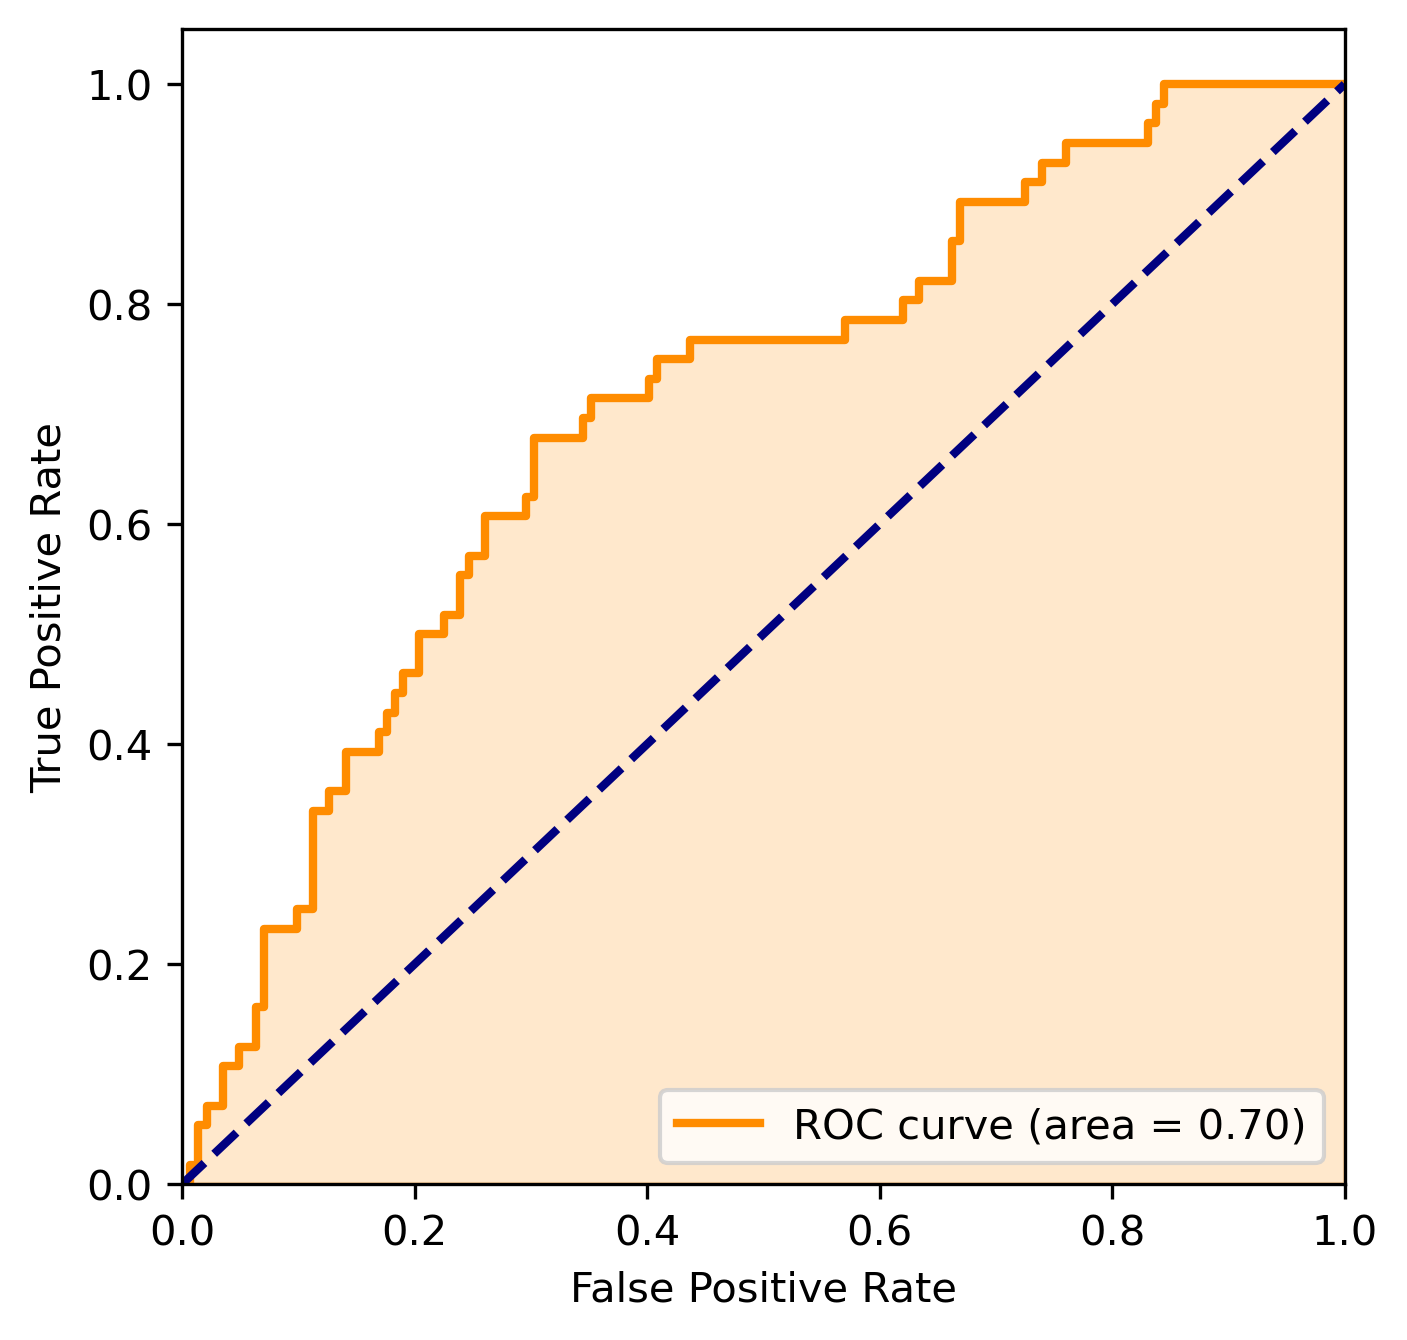

In [96]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=300)

plt.plot(fpr, 
        tpr, 
        color='darkorange', 
        lw=2, 
        label=f'ROC curve (area = {roc_auc:.2f})')

plt.fill_between(fpr, tpr, color='darkorange', alpha=0.2)  # alpha 参数控制填充颜色的透明度


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [97]:
for random_seed in range(0, 1000): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, np.array(y_train).reshape(-1))
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    

    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    
    roc_auc = auc(fpr, tpr)

    print(f"Seed: {random_seed} acc: {accuracy * 100.0} auc: {roc_auc}")

Seed: 0 acc: 72.72727272727273 auc: 0.6332304526748972
Seed: 1 acc: 78.78787878787878 auc: 0.5901817616902283
Seed: 2 acc: 73.73737373737373 auc: 0.5879729729729729
Seed: 3 acc: 74.24242424242425 auc: 0.6291891891891892
Seed: 4 acc: 70.70707070707071 auc: 0.5973621998258056
Seed: 5 acc: 70.2020202020202 auc: 0.6237684729064039
Seed: 6 acc: 73.23232323232324 auc: 0.5556278464541314
Seed: 7 acc: 74.74747474747475 auc: 0.5297222222222222
Seed: 8 acc: 73.73737373737373 auc: 0.5836044242029929
Seed: 9 acc: 78.28282828282829 auc: 0.5805515239477503
Seed: 10 acc: 76.76767676767676 auc: 0.5842490842490842
Seed: 11 acc: 75.25252525252525 auc: 0.612381865497877
Seed: 12 acc: 71.71717171717171 auc: 0.5346779440468445
Seed: 13 acc: 76.26262626262627 auc: 0.5502777777777778
Seed: 14 acc: 75.75757575757575 auc: 0.6486121530382596
Seed: 15 acc: 74.24242424242425 auc: 0.5484722222222221
Seed: 16 acc: 70.2020202020202 auc: 0.5785879770759663
Seed: 17 acc: 74.74747474747475 auc: 0.6554267650158061
Seed: